### load Data	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import time
import datetime
from collections import defaultdict
import ast

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.shape,test_data.shape

((3000, 23), (4398, 22))

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
# per_train_data=pd.DataFrame(train_data.isnull().sum()/len(train_data)*100)
per_train_data=train_data.isnull().sum()/len(train_data)*100

In [7]:
per_train_data

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

In [8]:
train_data['runtime']=train_data['runtime'].fillna(train_data['runtime'].mean())
per_train_data=pd.DataFrame(train_data.isnull().sum()/len(train_data)*100).T

Text(0, 0.5, 'Percentage of missing train data')

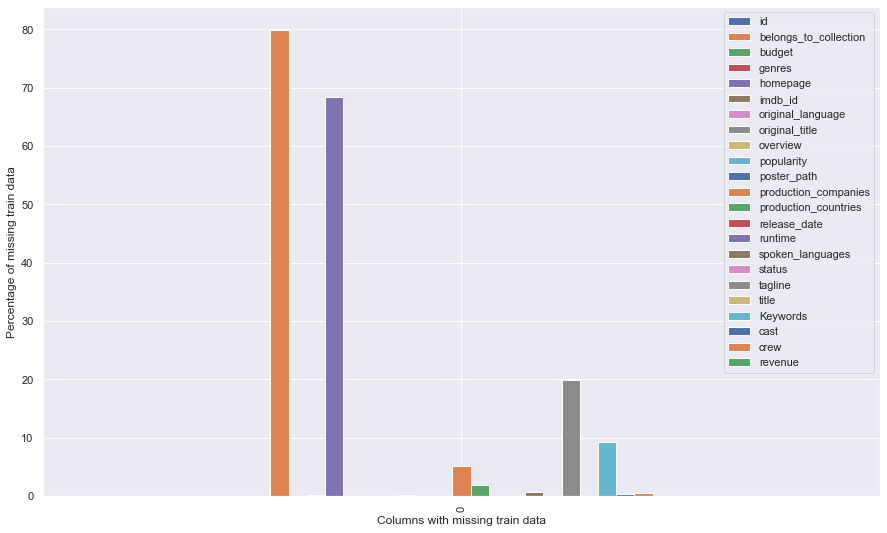

In [9]:
sns.set(rc={'figure.figsize':(15,9)})
per_train_data.plot(kind='bar')
plt.xlabel("Columns with missing train data")
plt.ylabel("Percentage of missing train data")

In [10]:
train_data['imdb_id']

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [11]:
train_data['original_language']

0       en
1       en
2       en
3       hi
4       ko
        ..
2995    en
2996    sv
2997    en
2998    en
2999    en
Name: original_language, Length: 3000, dtype: object

In [12]:
 train_data['poster_path']

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

In [13]:
train_data['overview']

0       When Lou, who has become the "father of the In...
1       Mia Thermopolis is now a college graduate and ...
2       Under the direction of a ruthless instructor, ...
3       Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4       Marine Boy is the story of a former national s...
                              ...                        
2995    Military men Rock Reilly and Eddie Devane are ...
2996    Three girls in 1980s Stockholm decide to form ...
2997    Samantha Caine, suburban homemaker, is the ide...
2998    Reuben Feffer is a guy who's spent his entire ...
2999    A young man sets out to uncover the truth abou...
Name: overview, Length: 3000, dtype: object

In [14]:
train_data['production_companies']

0       [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1             [{'name': 'Walt Disney Pictures', 'id': 2}]
2       [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                     NaN
4                                                     NaN
                              ...                        
2995    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
2996    [{'name': 'Memfis Film', 'id': 321}, {'name': ...
2997    [{'name': 'New Line Cinema', 'id': 12}, {'name...
2998    [{'name': 'Jersey Films', 'id': 216}, {'name':...
2999    [{'name': 'Lions Gate Films', 'id': 35}, {'nam...
Name: production_companies, Length: 3000, dtype: object

In [15]:
 train_data['production_countries']

0       [{'iso_3166_1': 'US', 'name': 'United States o...
1       [{'iso_3166_1': 'US', 'name': 'United States o...
2       [{'iso_3166_1': 'US', 'name': 'United States o...
3                 [{'iso_3166_1': 'IN', 'name': 'India'}]
4           [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
                              ...                        
2995    [{'iso_3166_1': 'US', 'name': 'United States o...
2996    [{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...
2997    [{'iso_3166_1': 'US', 'name': 'United States o...
2998    [{'iso_3166_1': 'US', 'name': 'United States o...
2999    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, Length: 3000, dtype: object

In [16]:
 train_data['tagline']

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

In [17]:
 train_data['title']

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

### data filter

In [18]:
train_data.drop(columns=['belongs_to_collection','homepage'],axis = 1 ,inplace=True)
train_data.drop(columns=['imdb_id', 'poster_path','tagline', 'overview', 'original_title','Keywords' ,'crew'],axis = 1 ,inplace=True)

In [19]:
train_data.shape

(3000, 14)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                2993 non-null   object 
 3   original_language     3000 non-null   object 
 4   popularity            3000 non-null   float64
 5   production_companies  2844 non-null   object 
 6   production_countries  2945 non-null   object 
 7   release_date          3000 non-null   object 
 8   runtime               3000 non-null   float64
 9   spoken_languages      2980 non-null   object 
 10  status                3000 non-null   object 
 11  title                 3000 non-null   object 
 12  cast                  2987 non-null   object 
 13  revenue               3000 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 328.2+ KB


In [21]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.079069,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [23]:
test_data.drop(columns=['belongs_to_collection','homepage'],axis = 1 ,inplace=True)
test_data.drop(columns=['imdb_id', 'poster_path','tagline', 'overview', 'original_title','Keywords' ,'crew'],axis = 1 ,inplace=True)

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4398 non-null   int64  
 1   budget                4398 non-null   int64  
 2   genres                4382 non-null   object 
 3   original_language     4398 non-null   object 
 4   popularity            4398 non-null   float64
 5   production_companies  4140 non-null   object 
 6   production_countries  4296 non-null   object 
 7   release_date          4397 non-null   object 
 8   runtime               4394 non-null   float64
 9   spoken_languages      4356 non-null   object 
 10  status                4396 non-null   object 
 11  title                 4395 non-null   object 
 12  cast                  4385 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 446.8+ KB


### data processing

### budget vs renveue

In [25]:
train_data[['id','title','budget','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='PuBu')

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


Text(0, 0.5, 'Revenue')

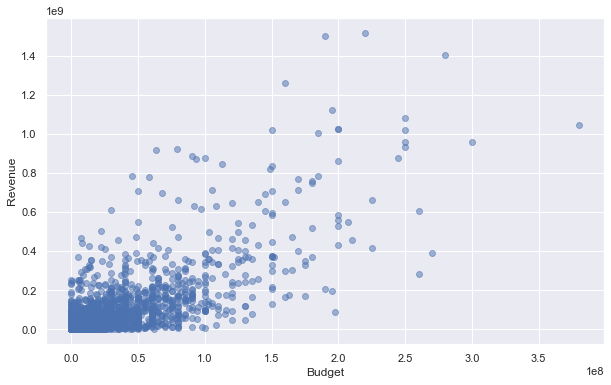

In [26]:
fig, ax  = plt.subplots(figsize = (10, 6))
ax.scatter(train_data['budget'], train_data['revenue'],alpha=0.5)
ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')

  At the first glance, budget seems to have a relatively high positive correlation with revenue.

### genres VS revenue	

In [27]:
train_data['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [28]:
# Extract genres
genres=train_data.loc[:,["genres"]]
genres["genres"]=train_data['genres'].fillna("None")
genres["genres"].head(5)

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [29]:
def extract_genres(row):
    if row == "None":
        return ['None']
    else:
        results = re.findall(r"'name': '(\w+\s?\w+)'", row)
        return results
    
genres["genres"] = genres["genres"].apply(extract_genres)

In [30]:
pd.DataFrame(genres["genres"])

,genres
0,[Comedy]
1,"[Comedy, Drama, Family, Romance]"
2,[Drama]
3,"[Thriller, Drama]"
4,"[Action, Thriller]"
...,...
2995,"[Comedy, Romance]"
2996,"[Drama, Music]"
2997,"[Crime, Action, Mystery, Thriller]"
2998,"[Comedy, Romance]"


In [31]:
genres_dict = dict()
for genre in genres["genres"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns=['Movie Numbers']
genres_df = genres_df.sort_values(by='Movie Numbers',ascending=False)

In [32]:
genres_df

,Movie Numbers
Drama,1531
Comedy,1028
Thriller,789
Action,741
Romance,571
Crime,469
Adventure,439
Horror,301
Science Fiction,290
Family,260


<AxesSubplot:>

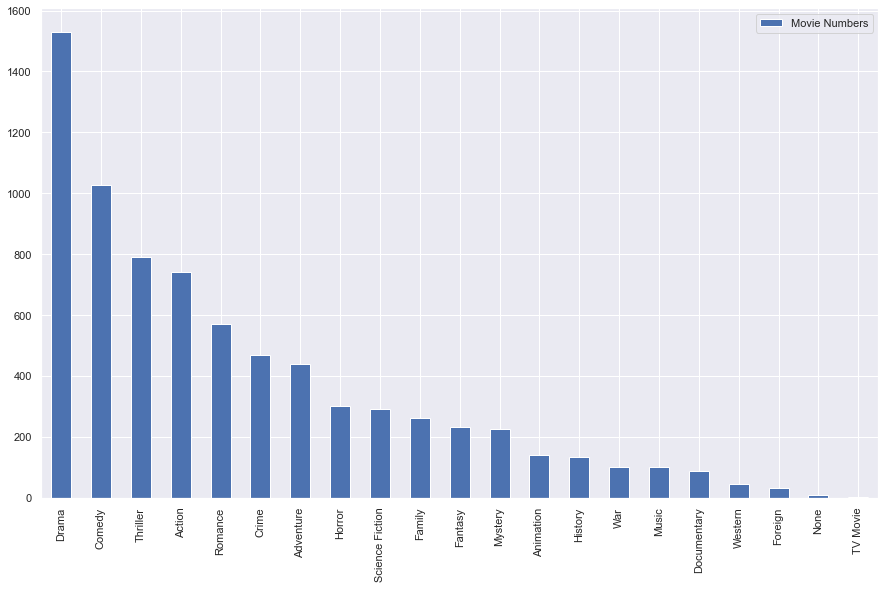

In [33]:
genres_df.plot.bar()

### popularity VS revenue

Text(0, 0.5, 'Revenue')

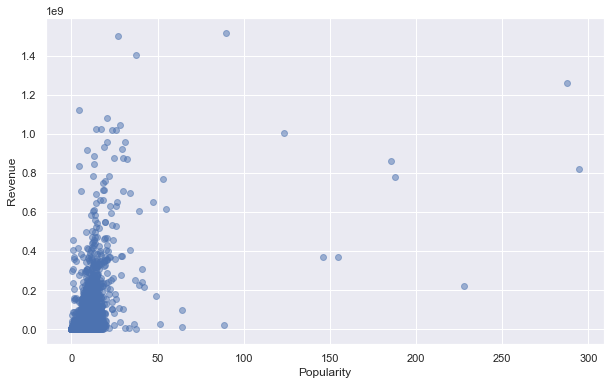

In [34]:
fig, ax  = plt.subplots(figsize = (10, 6))
ax.scatter(train_data['popularity'], train_data['revenue'],alpha=0.5)
ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')

In [35]:
train_data[['id','title','popularity','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='PuBu')

,id,title,popularity,revenue
1126,1127,The Avengers,89.887648,1519557910
1761,1762,Furious 7,27.275687,1506249360
2770,2771,Avengers: Age of Ultron,37.379420,1405403694
684,685,Beauty and the Beast,287.253654,1262886337
2322,2323,Transformers: Dark of the Moon,4.503505,1123746996
906,907,The Dark Knight Rises,20.582580,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,27.887720,1045713802
2562,2563,Finding Dory,14.477677,1028570889
881,882,Alice in Wonderland,17.285093,1025491110
734,735,Zootopia,26.024868,1023784195


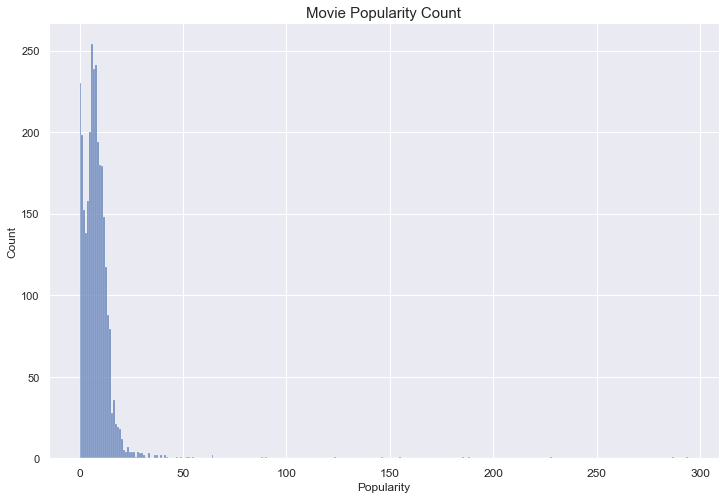

In [36]:
plt.figure(figsize=(12,8))
edgecolor=(0,0,0),
sns.histplot(train_data['popularity'].T, kde=False)
plt.title("Movie Popularity Count",fontsize=15)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.show()

### release_date vs revenue

In [37]:
train_data['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

In [38]:
#Extract release_date
train_data[['release_month', 'release_day', 'release_year']] = train_data['release_date'].str.split('/', expand = True).replace(np.nan, -1)

In [39]:
train_data['release_month'] = train_data['release_month'].astype(int)
train_data['release_day'] = train_data['release_day'].astype(int)
train_data['release_year'] = train_data['release_year'].astype(int)
train_data['day_of_Week'] = (pd.to_datetime(train_data["release_date"]).dt.dayofweek)
train_data.loc[(train_data['release_year'] <= 19) & (train_data['release_year'] < 100), "release_year"] += 2000
train_data.loc[(train_data['release_year'] > 19)  & (train_data['release_year'] < 100), "release_year"] += 1900   

In [40]:
indices = list([x - 1 for x in train_data.release_month.value_counts().index])
indices

[8, 9, 11, 7, 3, 2, 5, 1, 4, 10, 0, 6]

In [41]:
train_data.release_month.value_counts().sort_index()

1     212
2     226
3     238
4     245
5     224
6     237
7     209
8     256
9     362
10    307
11    221
12    263
Name: release_month, dtype: int64

In [42]:
train_data[['release_month','release_day','release_year','day_of_Week']]

,release_month,release_day,release_year,day_of_Week
0,2,20,2015,4
1,8,6,2004,4
2,10,10,2014,4
3,3,9,2012,4
4,2,5,2009,3
...,...,...,...,...
2995,4,22,1994,4
2996,3,28,2013,3
2997,10,11,1996,4
2998,1,16,2004,4


In [43]:
#Extract release_date
test_data[['release_month', 'release_day', 'release_year']] = test_data['release_date'].str.split('/', expand = True).replace(np.nan, -1)

In [44]:
test_data['release_month'] = test_data['release_month'].astype(int)
test_data['release_day'] = test_data['release_day'].astype(int)
test_data['release_year'] = test_data['release_year'].astype(int)
test_data['day_of_Week'] = (pd.to_datetime(test_data["release_date"]).dt.dayofweek)
test_data.loc[(test_data['release_year'] <= 19) & (test_data['release_year'] < 100), "release_year"] += 2000
test_data.loc[(test_data['release_year'] > 19)  & (test_data['release_year'] < 100), "release_year"] += 1900   

In [45]:
indices = list([x - 1 for x in test_data.release_month.value_counts().index])
indices

[8, 11, 7, 9, 4, 5, 6, 2, 10, 3, 0, 1, -2]

In [46]:
test_data.release_month.value_counts().sort_index()

-1       1
 1     300
 2     293
 3     326
 4     313
 5     361
 6     359
 7     358
 8     402
 9     542
 10    390
 11    320
 12    433
Name: release_month, dtype: int64

In [47]:
test_data[['release_month','release_day','release_year','day_of_Week']]

,release_month,release_day,release_year,day_of_Week
0,7,14,2007,5.0
1,5,19,1958,6.0
2,5,23,1997,4.0
3,9,4,2010,5.0
4,2,11,2005,4.0
...,...,...,...,...
4393,8,3,2001,4.0
4394,8,20,2004,4.0
4395,12,8,1982,2.0
4396,2,4,2015,2.0


### Year

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


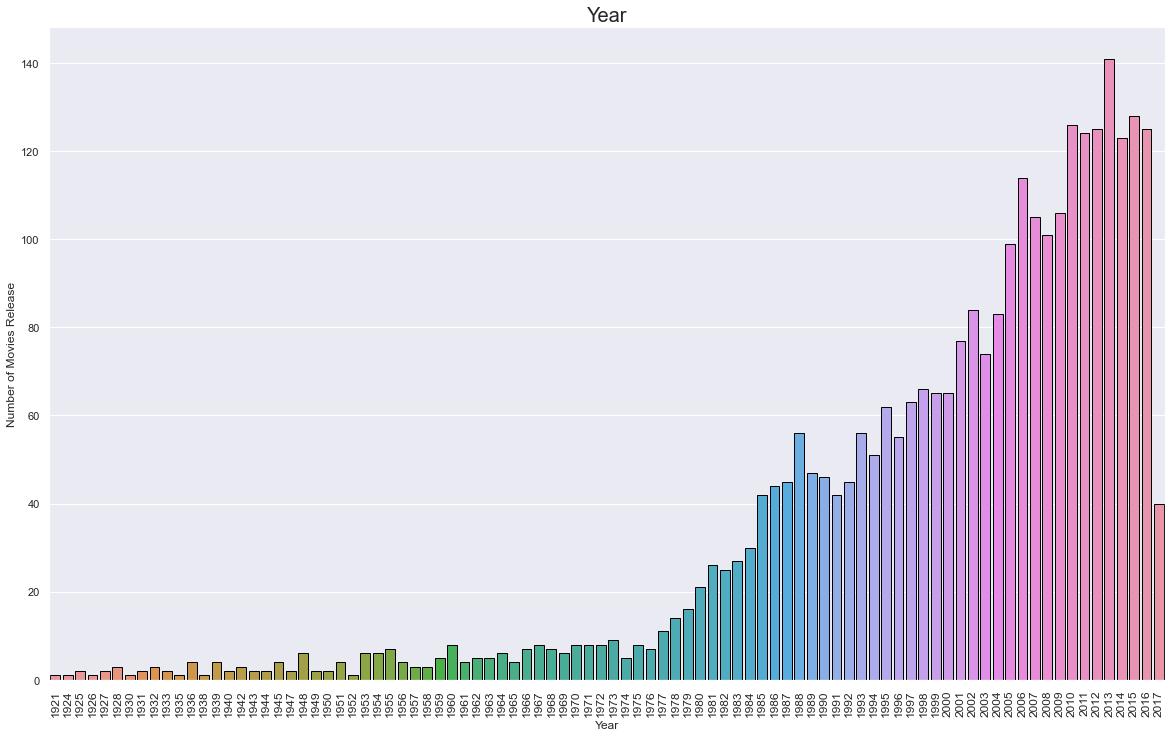

In [48]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train_data['release_year'].sort_values(), edgecolor=(0,0,0))
plt.title("Year",fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12,rotation=90)
plt.show()

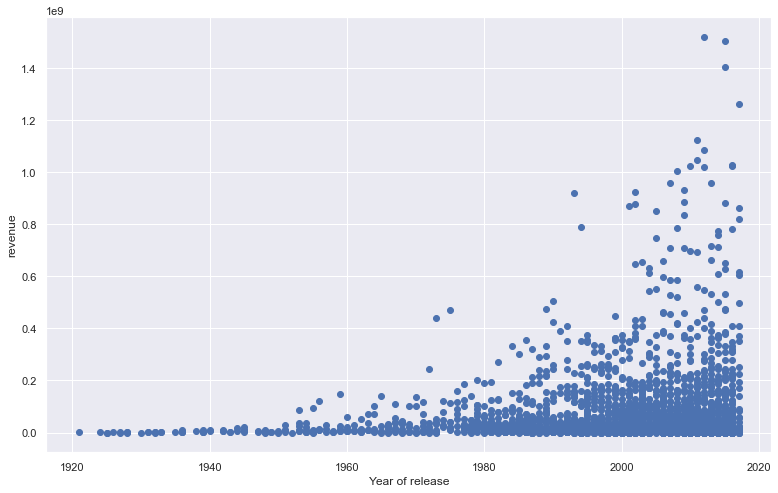

In [49]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(train_data['release_year'][:3000], train_data['revenue'][:3000])
revenue = train_data.groupby('release_year')["revenue"]
plt.xlabel("Year of release")
plt.ylabel("revenue")
plt.show()

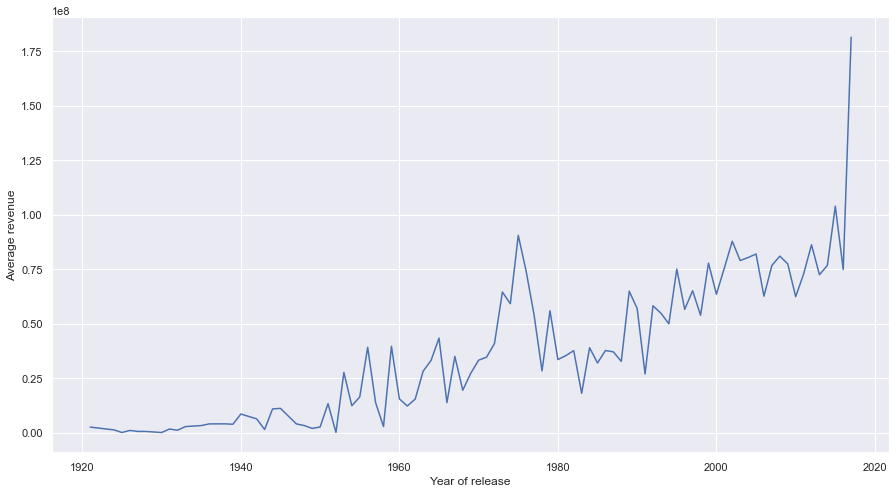

In [50]:
year = train_data['release_year']
revenue = train_data.groupby('release_year')["revenue"].aggregate('mean')
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(revenue.index,revenue)
plt.xlabel("Year of release")
plt.ylabel("Average revenue")
plt.show()

Text(0, 0.5, 'Average revenue')

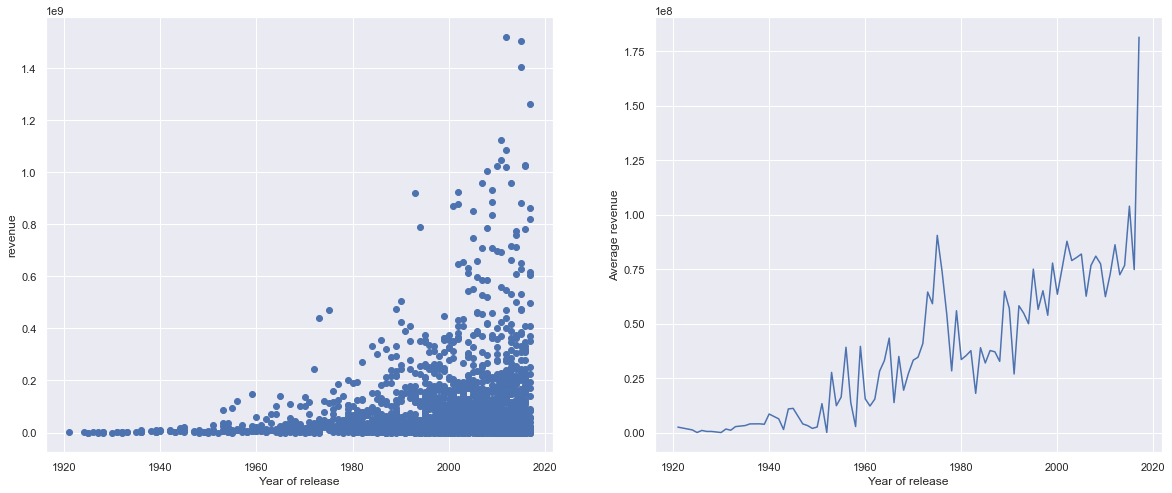

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].scatter(train_data['release_year'][:3000], train_data['revenue'][:3000])
revenue = train_data.groupby('release_year')["revenue"]
ax[0].set_xlabel("Year of release")
ax[0].set_ylabel("revenue")

revenue = train_data.groupby('release_year')["revenue"].aggregate('mean')
ax[1].plot(revenue.index,revenue)
ax[1].set_xlabel("Year of release")
ax[1].set_ylabel("Average revenue")


### Month

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


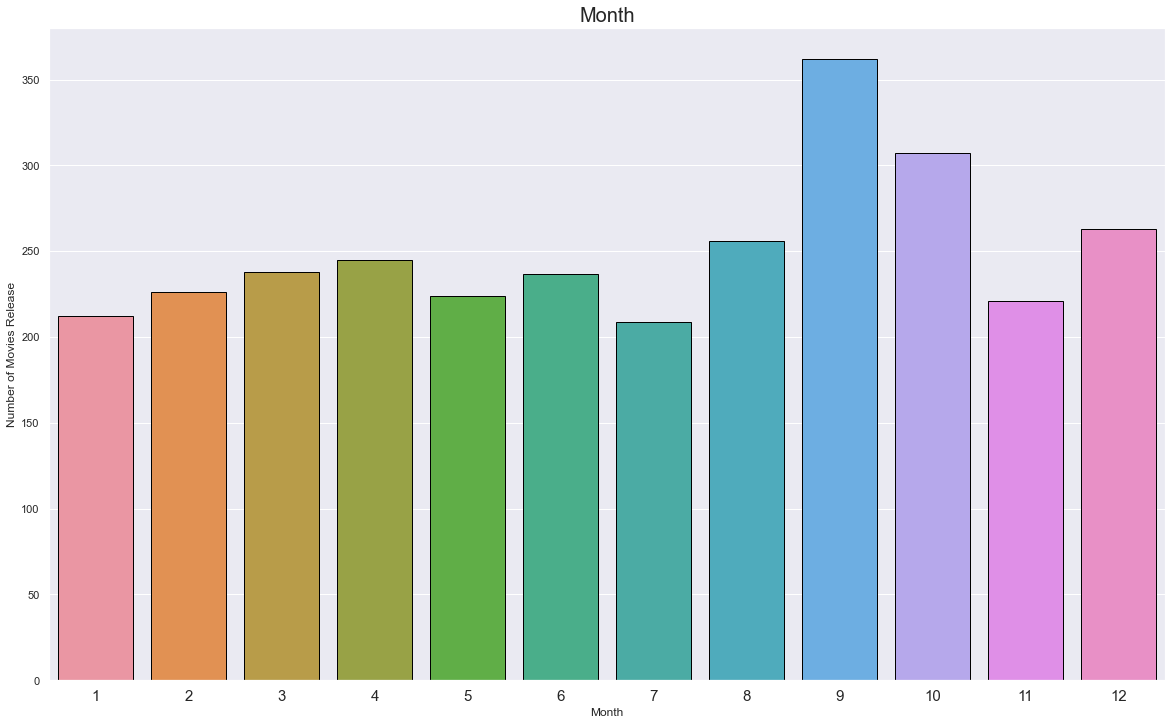

In [52]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train_data['release_month'].sort_values(), edgecolor=(0,0,0))
plt.title("Month",fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=15)
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

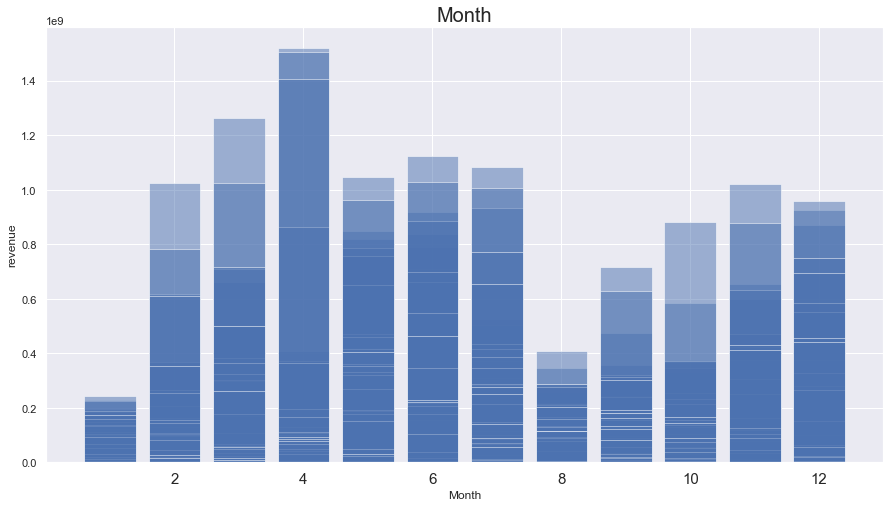

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(train_data['release_month'][:3000], train_data['revenue'][:3000], alpha=0.5)
plt.title("Month",fontsize=20)
plt.xlabel('Month')
plt.ylabel('revenue')
plt.xticks(fontsize=15)

### Week


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


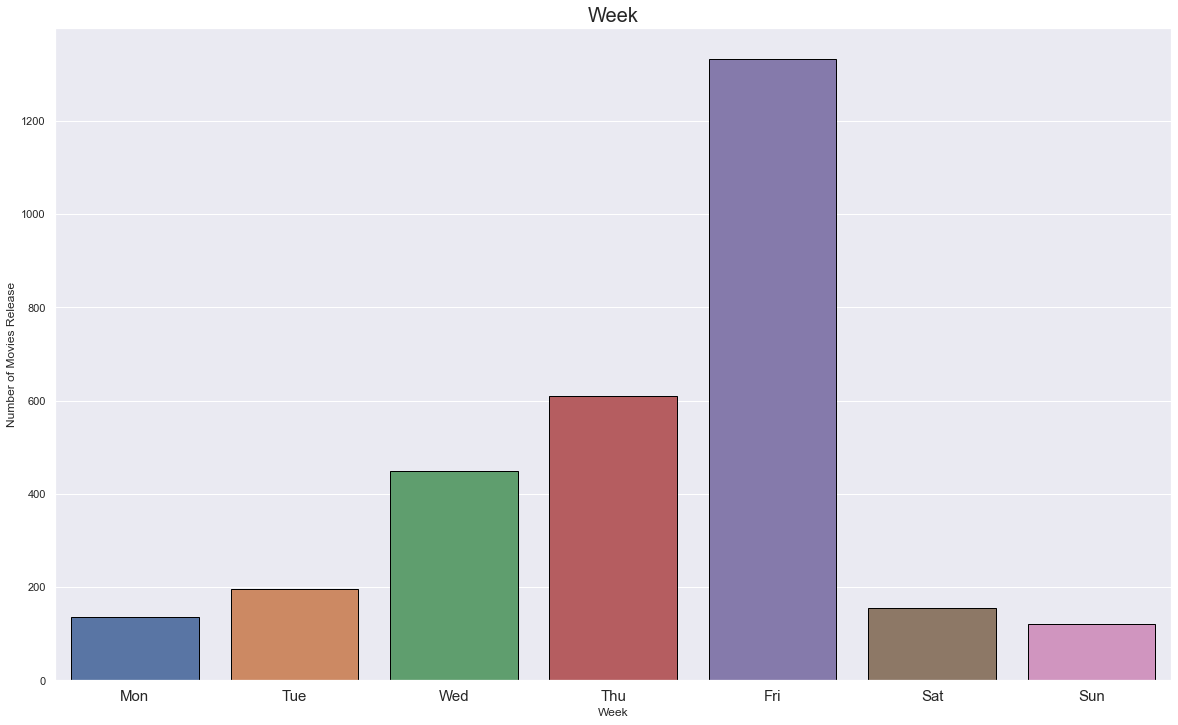

In [54]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train_data['day_of_Week'].sort_values(), edgecolor=(0,0,0))
plt.title("Week",fontsize=20)
plt.xlabel('Week')
plt.ylabel('Number of Movies Release')
loc = np.array(range(len(train_data['day_of_Week'].unique())))
labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(loc,labels,fontsize=15)
plt.show()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

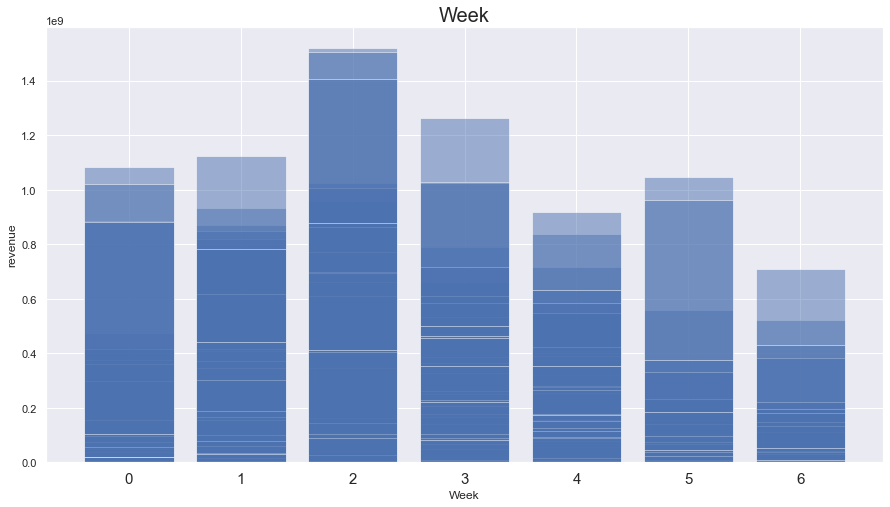

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(train_data['day_of_Week'][:3000], train_data['revenue'][:3000], alpha=0.5)
plt.title("Week",fontsize=20)
plt.xlabel('Week')
plt.ylabel('revenue')
plt.xticks(fontsize=15)

### runtime vs revenue

Text(0, 0.5, 'Number of Movies')

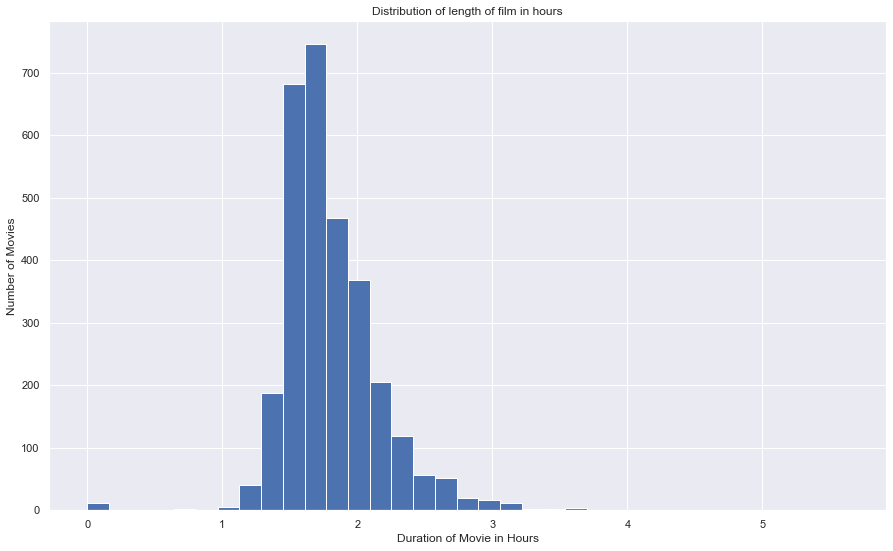

In [56]:
plt.hist(train_data['runtime'].fillna(0) / 60, bins=35);
plt.title('Distribution of length of film in hours', fontsize=12);
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

In [57]:
train_data[['id','title','runtime', 'budget', 'revenue']].sort_values(['runtime'],ascending=False).head(10).style.background_gradient(subset=['runtime','budget','revenue'], cmap='YlGn')

,id,title,runtime,budget,revenue
1211,1212,Carlos,338.000000,18000000,871279
1922,1923,Cleopatra,248.000000,31115000,71000000
523,524,The Ten Commandments,220.000000,13000000,122700000
1302,1303,Heaven's Gate,219.000000,44000000,3484331
1914,1915,Gods and Generals,214.000000,56000000,12923936
2353,2354,Jodhaa Akbar,213.000000,8376800,13000000
625,626,Ben-Hur,212.000000,15000000,146900000
1975,1976,Chapiteau-Show,207.000000,2000000,393816
1731,1732,Hey Ram,199.000000,3900000,4900000
2120,2121,Spartacus,197.000000,12000000,60000000


In [58]:
train_data.shape

(3000, 18)

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                2993 non-null   object 
 3   original_language     3000 non-null   object 
 4   popularity            3000 non-null   float64
 5   production_companies  2844 non-null   object 
 6   production_countries  2945 non-null   object 
 7   release_date          3000 non-null   object 
 8   runtime               3000 non-null   float64
 9   spoken_languages      2980 non-null   object 
 10  status                3000 non-null   object 
 11  title                 3000 non-null   object 
 12  cast                  2987 non-null   object 
 13  revenue               3000 non-null   int64  
 14  release_month         3000 non-null   int32  
 15  release_day          

In [60]:
test_data.shape

(4398, 17)

In [61]:
train_data['log_revenue'] = np.log(train_data['revenue'])

In [62]:
# feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
#                  'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
#                 'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']
feature_names = ['release_year', 'release_day', 'release_month',
                 'budget', 'popularity', 'runtime']

In [63]:
X_data=train_data[feature_names]
y_data=np.array(train_data['log_revenue'])

In [64]:
y_data

array([16.32630025, 18.37095921, 16.38751191, ..., 18.30926595,
       18.96279214, 18.22329211])

In [65]:
y_data.shape

(3000,)

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2, random_state=0)

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf=RandomForestRegressor(n_estimators=100, random_state=0)

In [69]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
# Calculate MAE 
mae_rf = mean_absolute_error(y_pre, y_test)
mae_rf

1.4898738044207505